# Initial Exploratory Data Analysis - Data Quality Check

This notebook aims to perform checks and verifications in the quality of the extracted data.

In [1]:
import os
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
warnings.filterwarnings('ignore')

# definition of constants
DATASOURCE = '../../data/1_raw'
DATANAME = 'PM_train.txt'

In [2]:
# load the train set (previous look showed that is a txt file with no headers and the separator is a blank space)
data = pd.read_csv(os.path.join(DATASOURCE, DATANAME), header=None, sep=' ')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [3]:
# there are two additional and fully null columns that must be removed
data.drop([26, 27], axis=1, inplace=True)

In [4]:
# the columns must have a name (looking into the project description or the datasource)
real_names = ['history_id', 'runtime', 'set1', 'set2', 'set3']
for i in range(21):
    real_names.append(f'tag{i+1}')

# rename columns
data.columns = real_names
data.head()

,history_id,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,...,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
# check general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   history_id  20631 non-null  int64  
 1   runtime     20631 non-null  int64  
 2   set1        20631 non-null  float64
 3   set2        20631 non-null  float64
 4   set3        20631 non-null  float64
 5   tag1        20631 non-null  float64
 6   tag2        20631 non-null  float64
 7   tag3        20631 non-null  float64
 8   tag4        20631 non-null  float64
 9   tag5        20631 non-null  float64
 10  tag6        20631 non-null  float64
 11  tag7        20631 non-null  float64
 12  tag8        20631 non-null  float64
 13  tag9        20631 non-null  float64
 14  tag10       20631 non-null  float64
 15  tag11       20631 non-null  float64
 16  tag12       20631 non-null  float64
 17  tag13       20631 non-null  float64
 18  tag14       20631 non-null  float64
 19  tag15       20631 non-nul

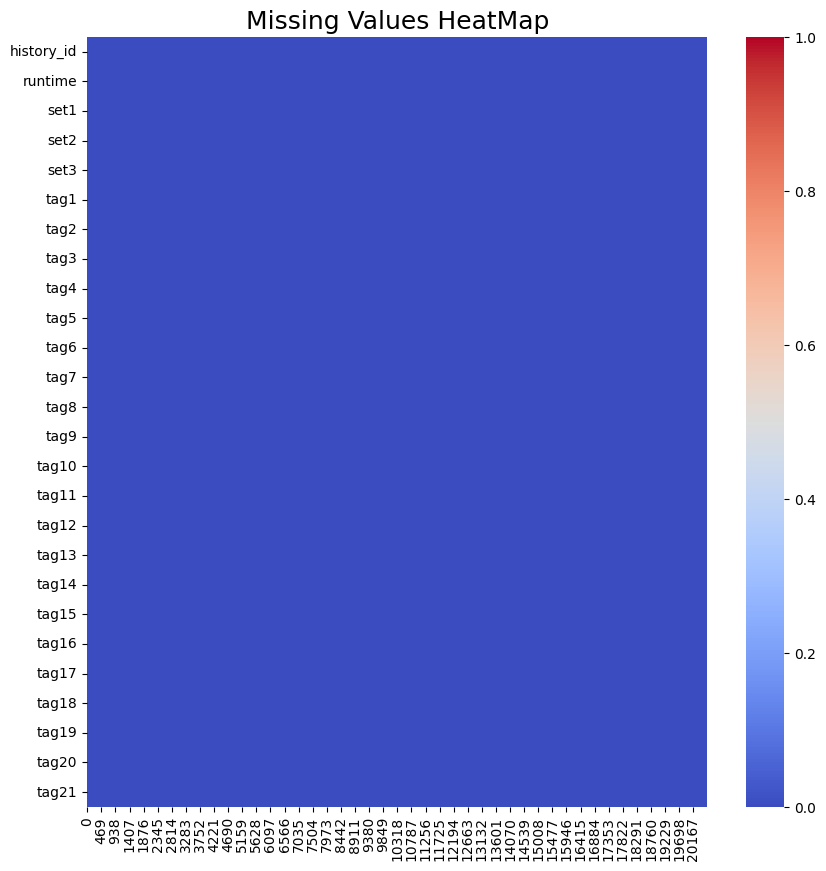

In [6]:
# lets confirm if there are no missing values
plt.figure(figsize=(10, 10))
sns.heatmap(data.isna().T, vmin=0, vmax=1, cmap='coolwarm')
plt.title('Missing Values HeatMap', size=18)
plt.show()

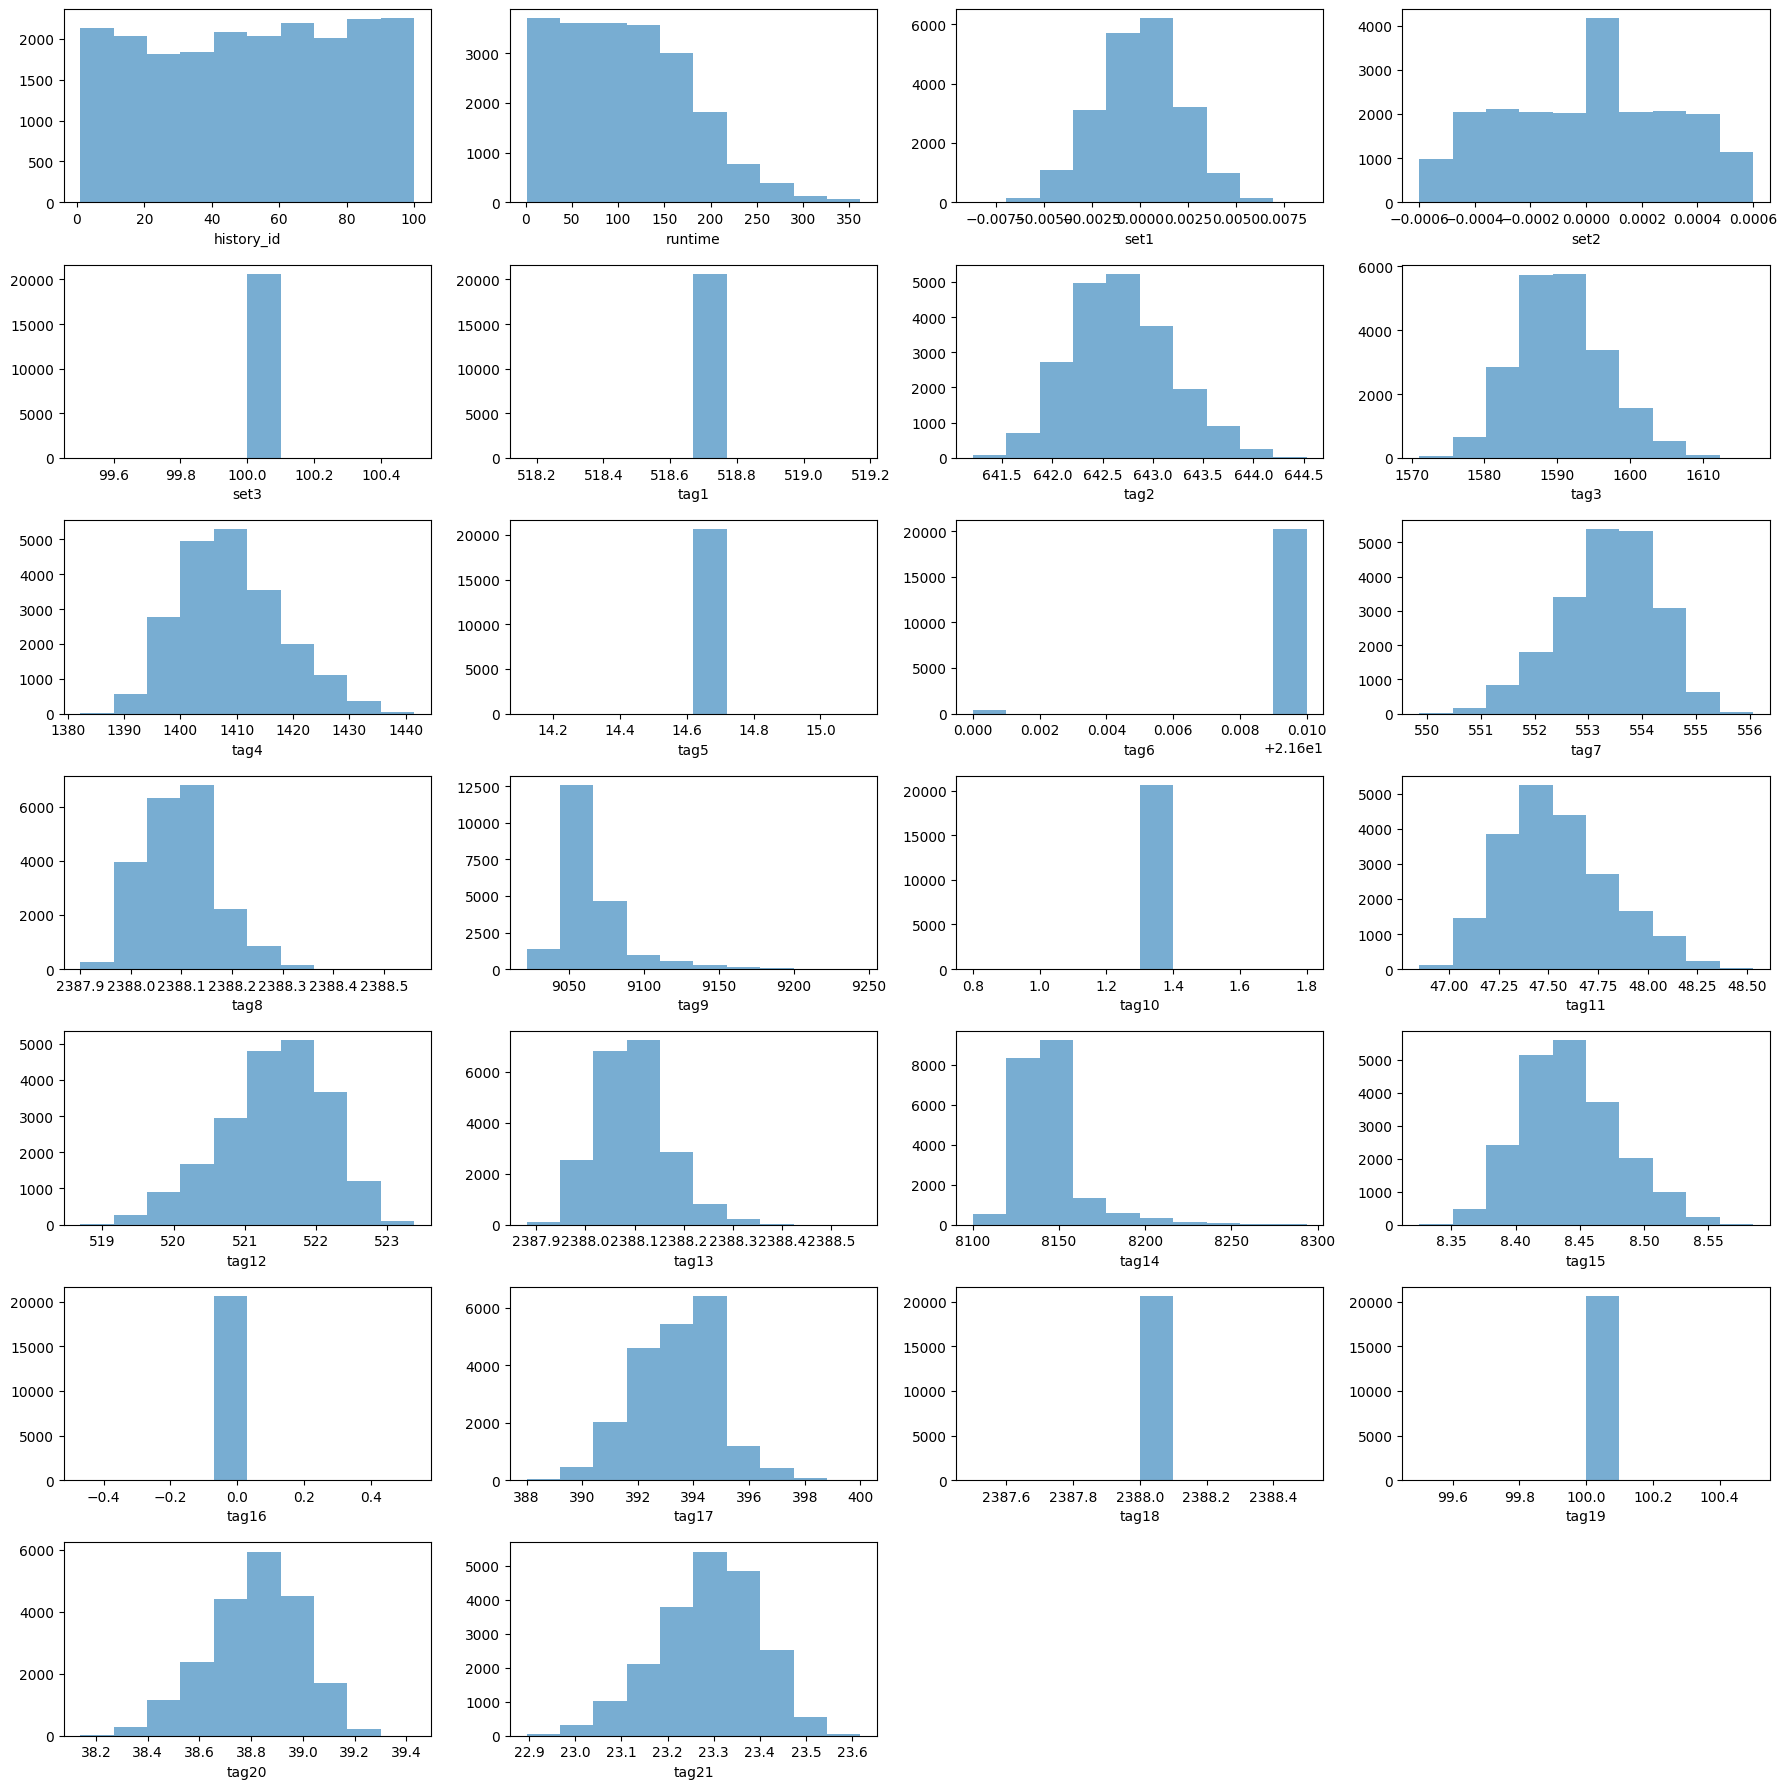

In [7]:
# are there zero or low variance features?
fig = plt.figure(figsize=(18, 18))
for i in range(1, 27):
    ax = fig.add_subplot(7, 4, i)
    ax.hist(data.iloc[:, i-1], alpha=0.6)
    ax.set_xlabel(data.columns[i-1])
plt.tight_layout()
plt.show()

In [8]:
# check variance of all columns
stats = data.describe().T
stats['CV'] = stats['std'] / (stats['mean'] + .1)

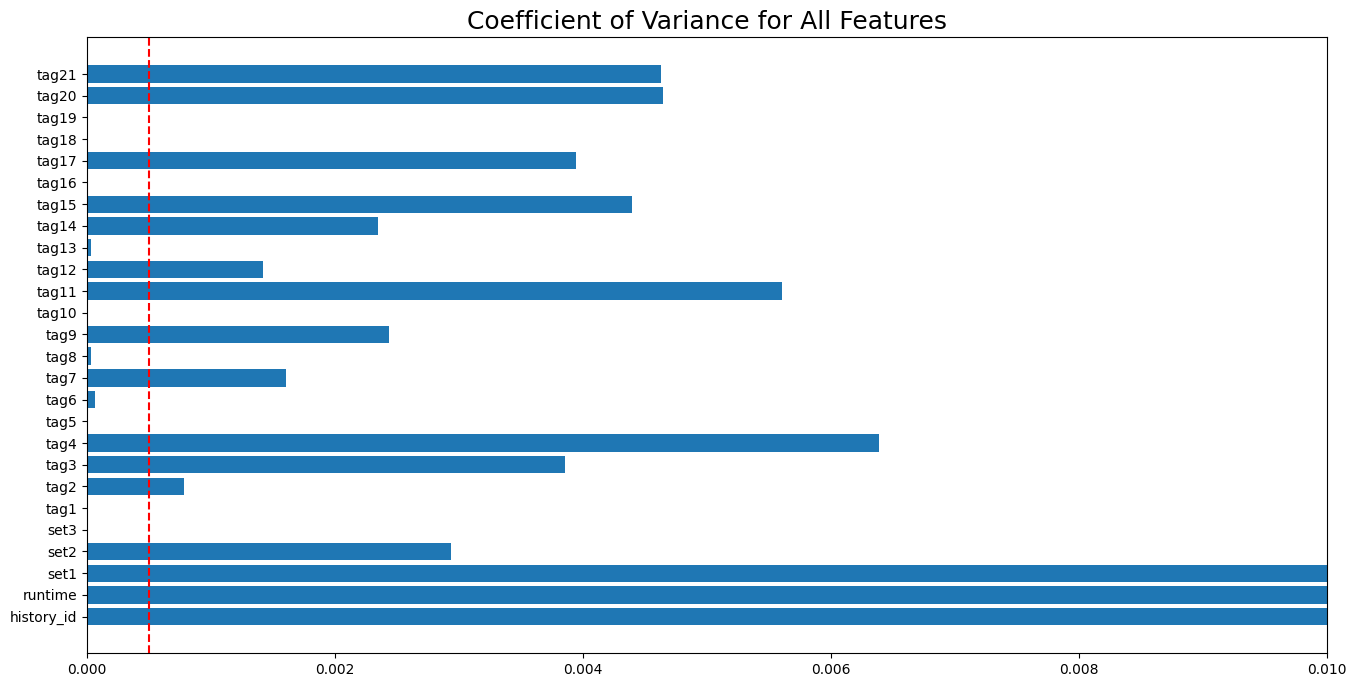

In [9]:
plt.figure(figsize=(16, 8))
plt.barh(stats.index, stats.CV)
plt.xlim([0, 0.01])
plt.title('Coefficient of Variance for All Features', size=18)
plt.axvline(x=0.0005, color='red', ls='--')
plt.show()

In [10]:
# extract very low relative variance
to_drop = stats.loc[stats.CV < 0.0005].index

# drop columns
data.drop(to_drop, axis=1, inplace=True)
data.head()

,history_id,runtime,set1,set2,tag2,tag3,tag4,tag7,tag9,tag11,tag12,tag14,tag15,tag17,tag20,tag21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,9046.19,47.47,521.66,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,9044.07,47.49,522.28,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,9052.94,47.27,522.42,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,9049.48,47.13,522.86,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,9055.15,47.28,522.19,8133.80,8.4294,393,38.90,23.4044


In [11]:
# check for duplicated rows (they reduce variance and mask the true importance of the features)

# select only process variables columns
to_check = [c for c in data.columns if c not in ['history_id', 'runtime']]

# check for duplicated rows
data[to_check].duplicated().sum()

0

In [12]:
# check for duplicated columns (they reduce feature importances)

# list the combinations of columns 2-to-2
comb = itertools.combinations(data.columns, 2)

# iterate through the combinations and compare the pairs
dup_cols = []
for col1, col2 in comb:
    if ((col1 not in dup_cols) and (col2 not in dup_cols)):
        if data[col1].equals(data[col2]):
            dup_cols.append(col1)

# how many duplicated columns?
print('Duplicated columns: ', len(dup_cols))

# drop duplicated, if any
data.drop(dup_cols, axis=1, inplace=True)

Duplicated columns:  0


In [13]:
# check data size
data.shape

(20631, 16)

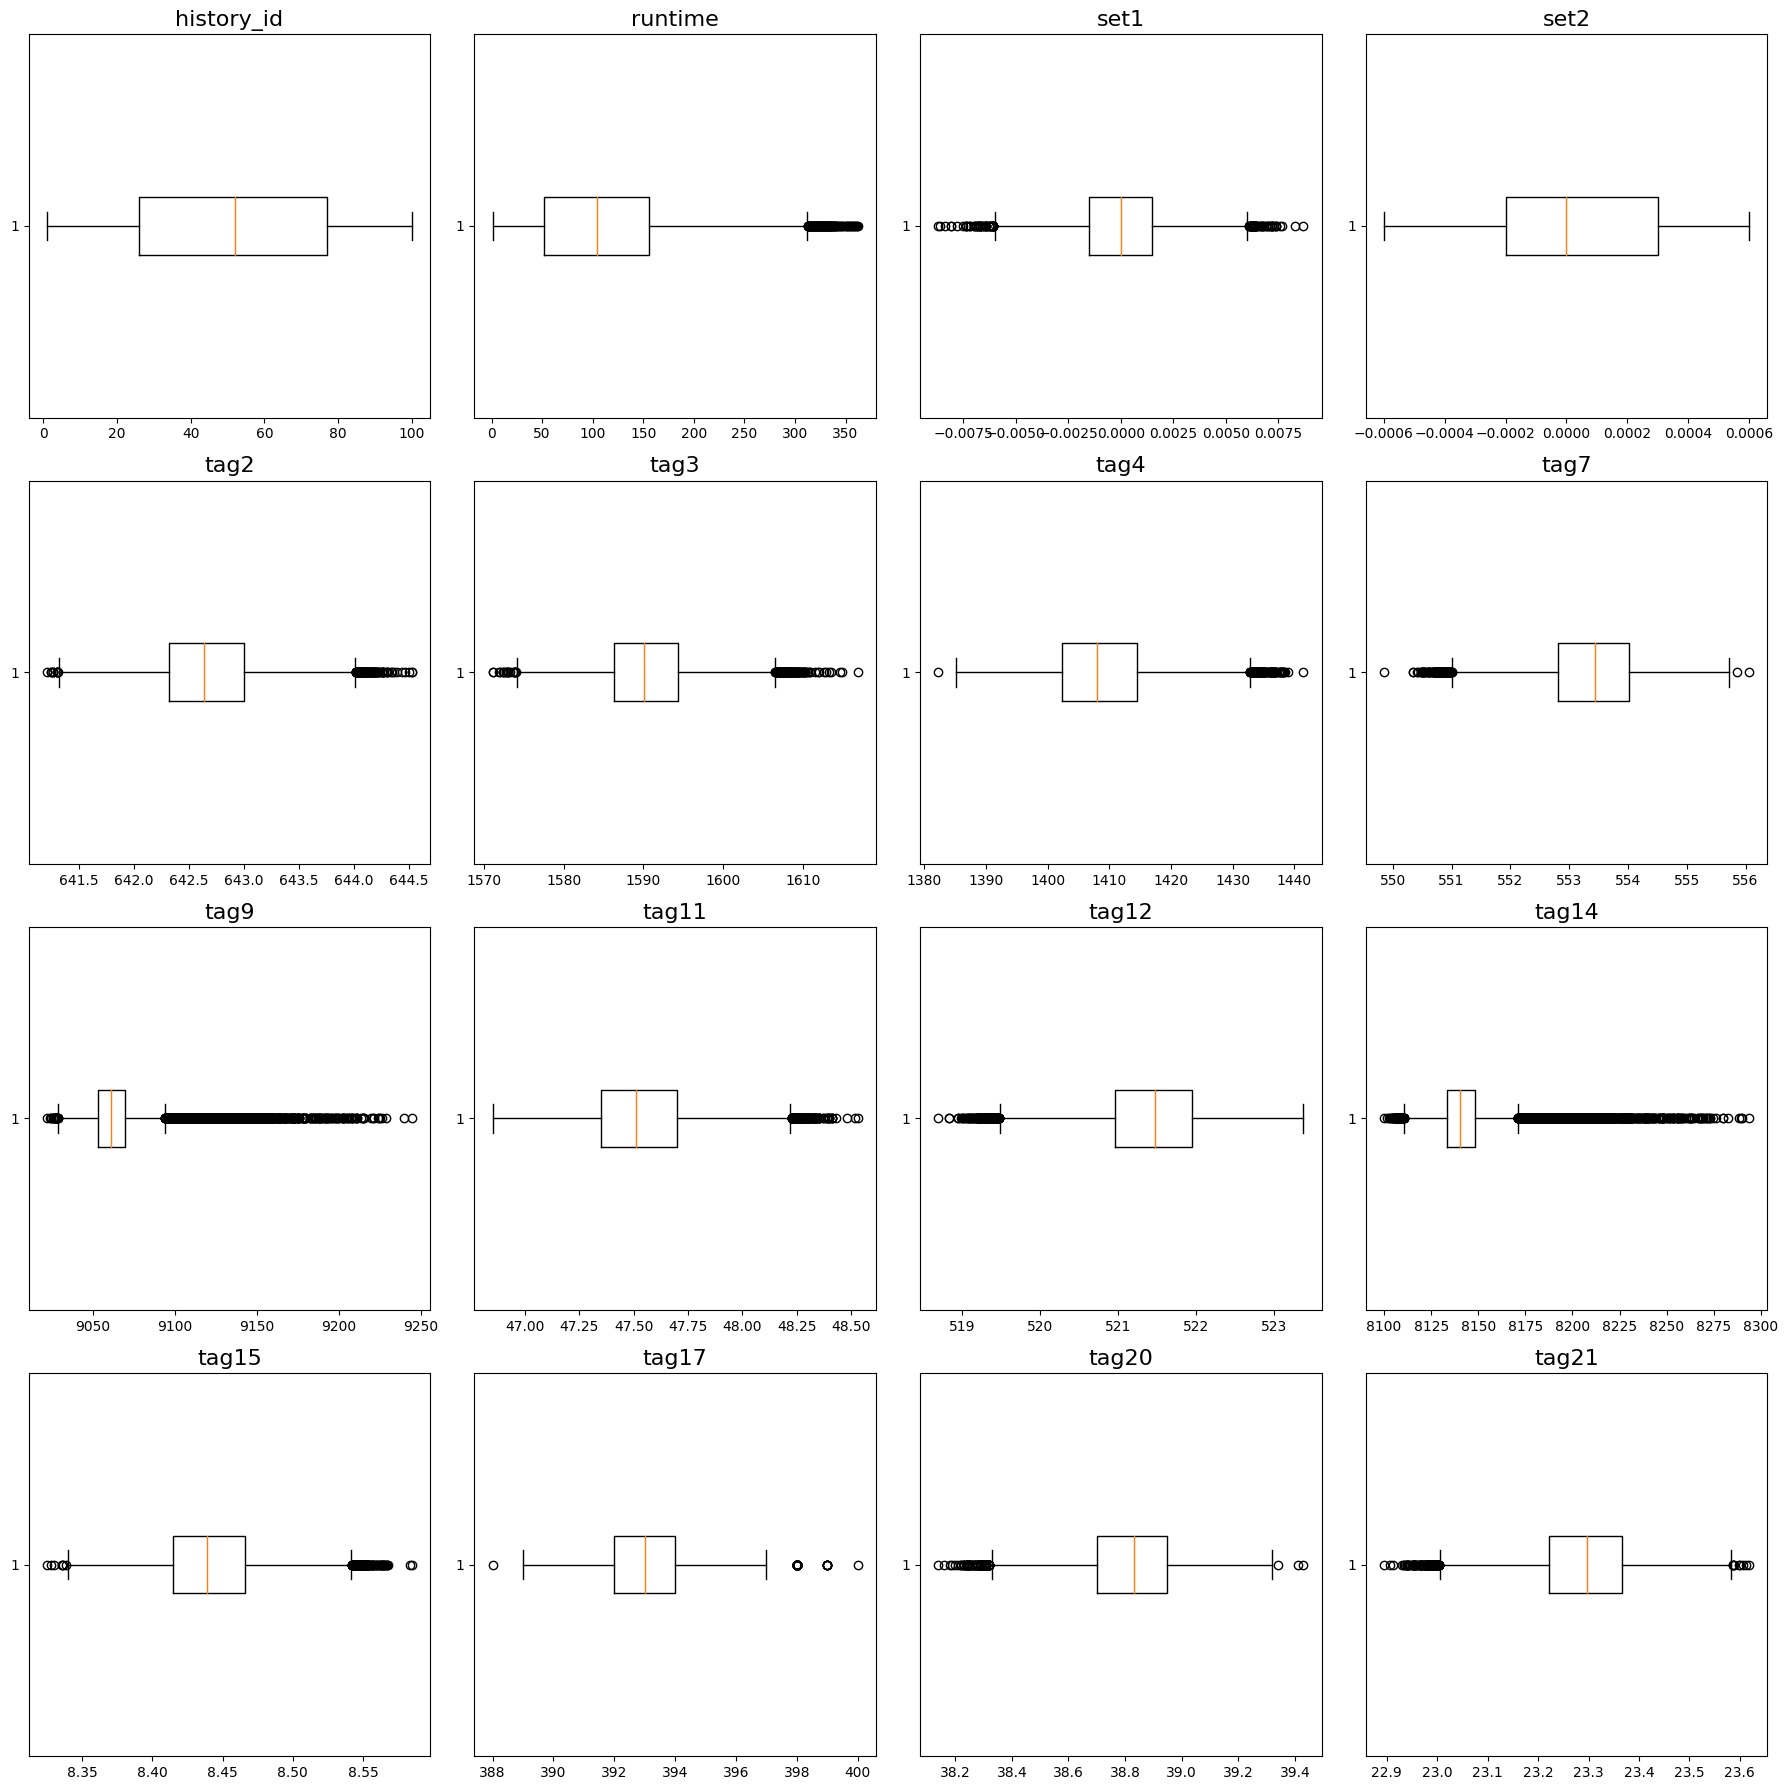

In [14]:
# check for outliers
fig = plt.figure(figsize=(18, 18))
for i in range(1, 17):
    ax = fig.add_subplot(4, 4, i)
    ax.boxplot(data.iloc[:, i-1], vert=False)
    ax.set_title(data.columns[i-1], size=16)
plt.tight_layout()
plt.show()